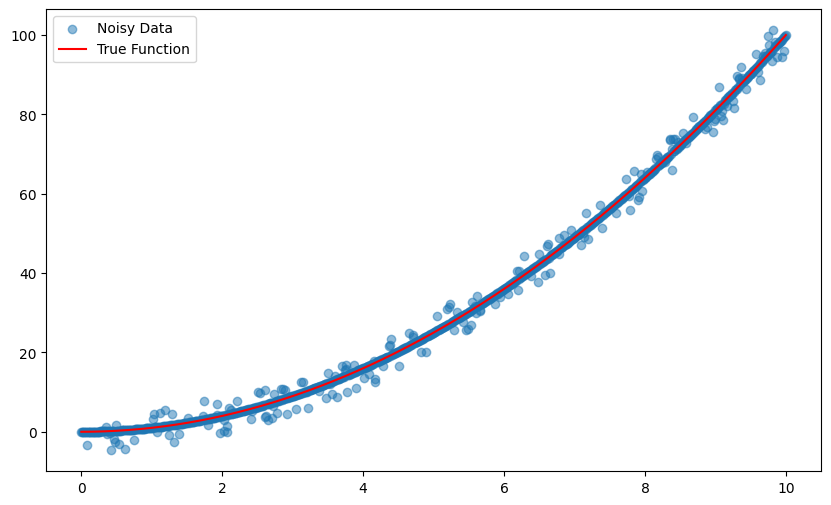

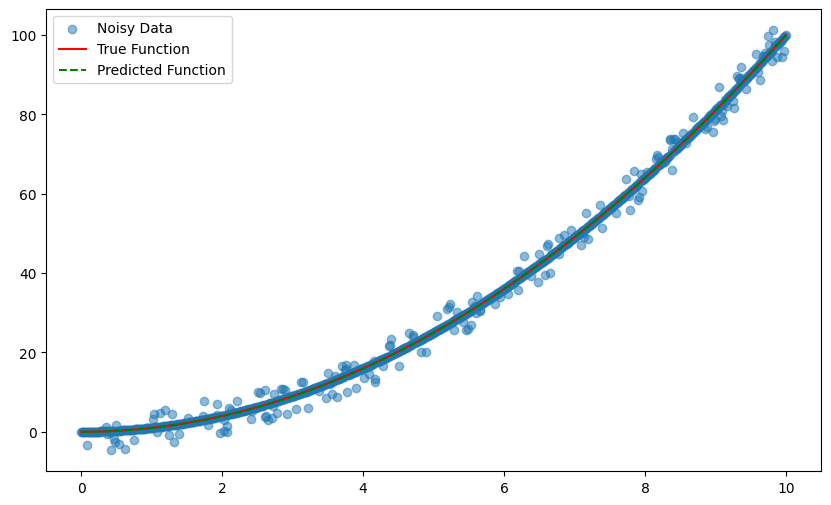

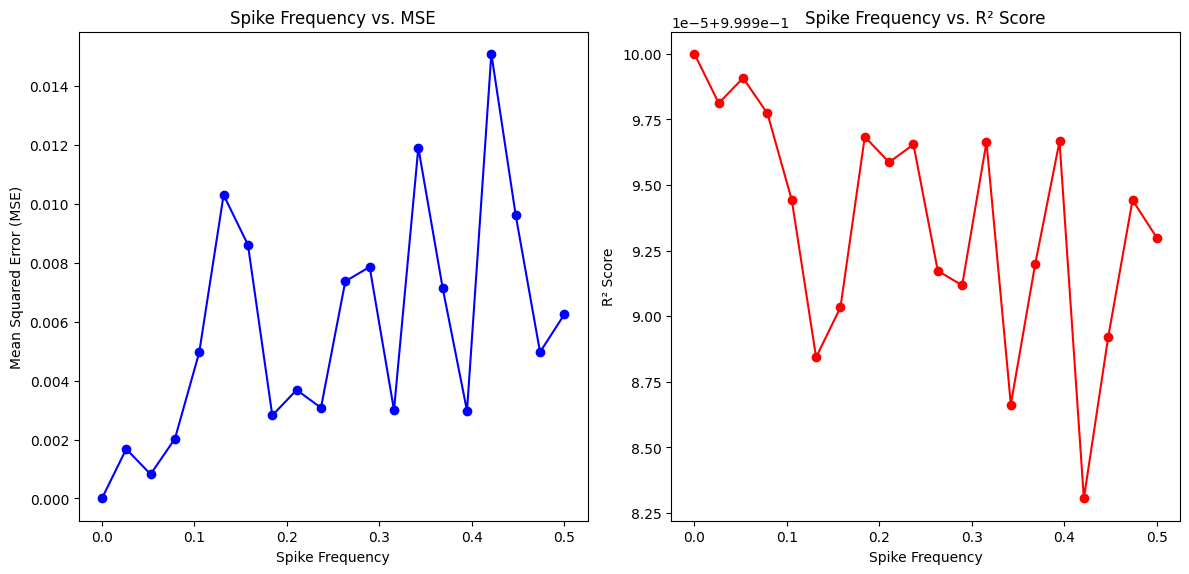

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    # Generate spikes
    spikes = np.zeros(n_samples)
    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)
    spikes[spike_indices] = spike_magnitude * (2 * np.random.rand(n_spikes) - 1)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

# Example usage
x, y_true, y_noisy = generate_data(1000, 0.2, 5)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, alpha=0.5, label='Noisy Data')
plt.plot(x, y_true, 'r-', label='True Function')
plt.legend()
plt.show()

class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        self.weights = np.linalg.pinv(X_aug).dot(y)

    def predict(self, X):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return X_aug.dot(self.weights)

# Example usage
model = LinearRegression(degree=2)
X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
model.fit(X, y_noisy)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, alpha=0.5, label='Noisy Data')
plt.plot(x, y_true, 'r-', label='True Function')
plt.plot(x, y_pred, 'g--', label='Predicted Function')
plt.legend()
plt.show()

def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Testing different spike frequencies
spike_frequencies = np.linspace(0, 0.5, 20)
mse_list = []
r2_list = []

for freq in spike_frequencies:
    x, y_true, y_noisy = generate_data(1000, freq, 5)

    model = LinearRegression(degree=2)
    X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
    model.fit(X, y_noisy)
    y_pred = model.predict(X)

    mse, r2 = evaluate_model(y_true, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(spike_frequencies, mse_list, 'b-o')
plt.xlabel('Spike Frequency')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Spike Frequency vs. MSE')

plt.subplot(1, 2, 2)
plt.plot(spike_frequencies, r2_list, 'r-o')
plt.xlabel('Spike Frequency')
plt.ylabel('R² Score')
plt.title('Spike Frequency vs. R² Score')

plt.tight_layout()
plt.show()
